<a href="https://colab.research.google.com/github/grvtaun/Machine-Learning/blob/main/Regression_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('covid_data_kerala.csv')

In [ ]:
df.shape


(541, 4)

In [ ]:
df.head

<bound method NDFrame.head of      Date  Confirmed  Recovered  Deceased
0     Jan          0        NaN         0
1       F          0        NaN         0
2       F          1        NaN         0
3       F          1        NaN         0
4       F          0        NaN         0
..    ...        ...        ...       ...
536  June      16848    12052.0       104
537  June      17481    14131.0       105
538  June      12818    13454.0       122
539  June      17518    11067.0       132
540  June      18531    15507.0        98

[541 rows x 4 columns]>

In [ ]:
df.isnull().sum()


Date          0
Confirmed     0
Recovered    56
Deceased      0
dtype: int64

In [ ]:
df.dtypes

Date          object
Confirmed      int64
Recovered    float64
Deceased       int64
dtype: object

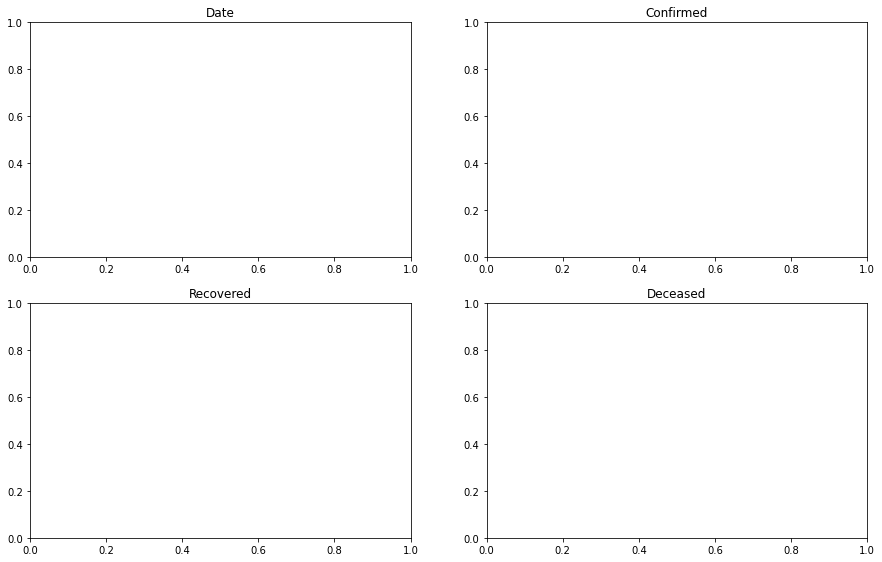

In [ ]:
#checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(5,2,count)
    plt.title(col)
    count +=1
        
plt.show()

In [ ]:
df.corr()

,Confirmed,Recovered,Deceased
Confirmed,1.000000,0.800702,0.653328
Recovered,0.800702,1.000000,0.735636
Deceased,0.653328,0.735636,1.000000


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,:-1].values

In [ ]:
X.shape

(541, 3)

In [ ]:
y.shape

(541, 3)

In [ ]:
df.head

<bound method NDFrame.head of      Date  Confirmed  Recovered  Deceased
0     Jan          0        NaN         0
1       F          0        NaN         0
2       F          1        NaN         0
3       F          1        NaN         0
4       F          0        NaN         0
..    ...        ...        ...       ...
536  June      16848    12052.0       104
537  June      17481    14131.0       105
538  June      12818    13454.0       122
539  June      17518    11067.0       132
540  June      18531    15507.0        98

[541 rows x 4 columns]>

In [ ]:
d1 = pd.get_dummies(df,drop_first= True)

In [ ]:
d1.head

<bound method NDFrame.head of      Confirmed  Recovered  Deceased  ...  Date_N  Date_Oct  Date_Sep
0            0        NaN         0  ...       0         0         0
1            0        NaN         0  ...       0         0         0
2            1        NaN         0  ...       0         0         0
3            1        NaN         0  ...       0         0         0
4            0        NaN         0  ...       0         0         0
..         ...        ...       ...  ...     ...       ...       ...
536      16848    12052.0       104  ...       0         0         0
537      17481    14131.0       105  ...       0         0         0
538      12818    13454.0       122  ...       0         0         0
539      17518    11067.0       132  ...       0         0         0
540      18531    15507.0        98  ...       0         0         0

[541 rows x 13 columns]>

In [ ]:
print(df.columns)

Index(['Date', 'Confirmed', 'Recovered', 'Deceased'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

ValueError: ignored

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [ ]:

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)